In [ ]:
#pip install yfinance

In [44]:
import yfinance as yf

aapl_data = yf.download("AAPL", start="2023-01-01", end="2023-12-31")

# Access daily closing prices
daily_closing_prices = aapl_data['Close']

# Print sample data
print(daily_closing_prices.head())


[*********************100%%**********************]  1 of 1 completed

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
Name: Close, dtype: float64


In [45]:
daily_closing_prices.to_csv('dataset.csv')

In [46]:
print(daily_closing_prices)

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Close, Length: 250, dtype: float64


DATA VISUALIZATION

In [18]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
df=pd.read_csv('dataset.csv')

In [48]:
df.head()

,Date,Close
0,2023-01-03,125.070000
1,2023-01-04,126.360001
2,2023-01-05,125.019997
3,2023-01-06,129.619995
4,2023-01-09,130.149994


DATA VISUALIZATION

In [17]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


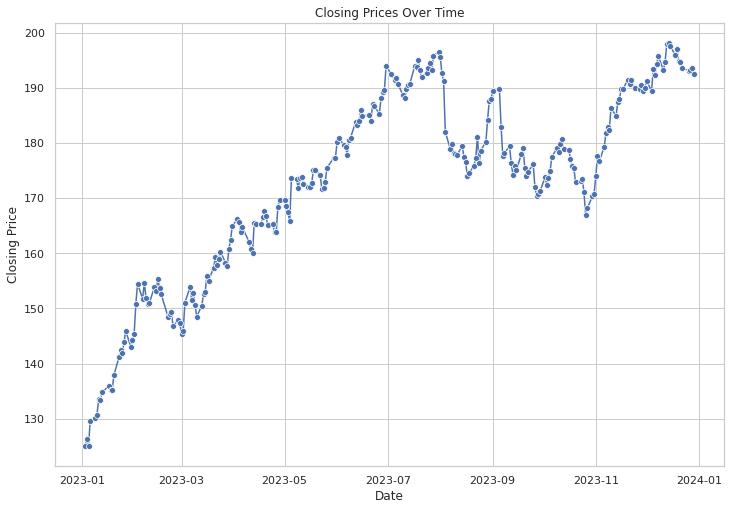

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the plotting style (optional)
sns.set(style="whitegrid")

# Plotting the line chart using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Close', data=df, marker='o')

# Adding labels and title
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Display the plot
plt.show()


MOVING AVERAGE

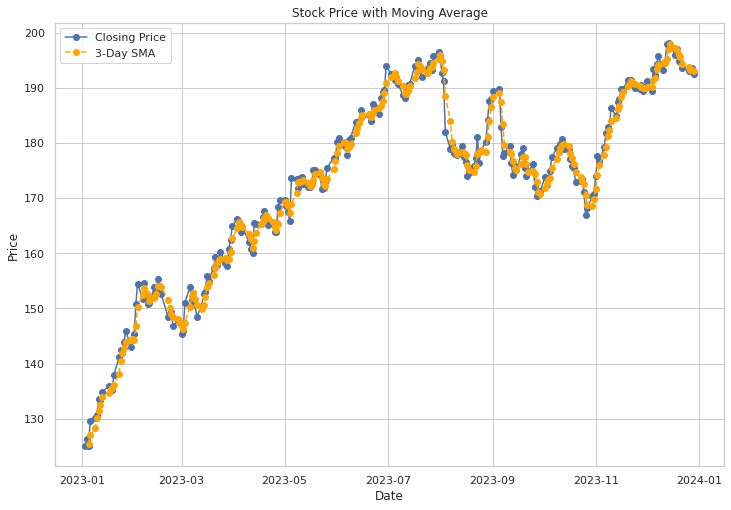

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

window_size = 3
df['SMA'] = df['Close'].rolling(window=window_size).mean()

# Plot the closing prices and the moving average
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Closing Price', marker='o')
plt.plot(df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='orange', marker='o')

# Customize the plot
plt.title('Stock Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

ARMA MODEL

In [15]:
pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Root Mean Squared Error (RMSE): 14.148487255660806


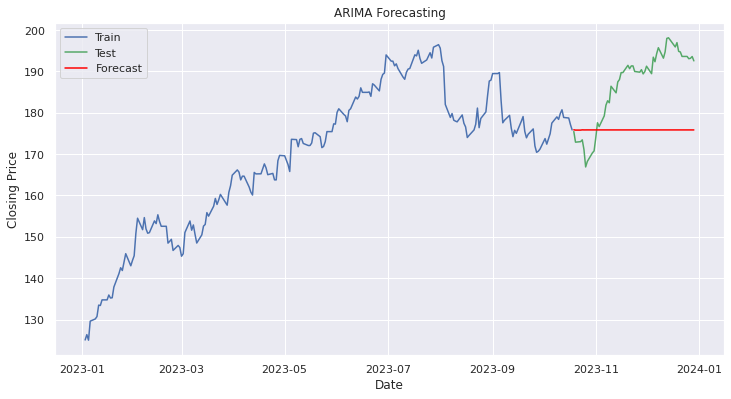

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')  
df= df.reindex(full_date_range).fillna(method='ffill')  

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

model = ARIMA(train['Close'], order=(5,1,0))  # Adjust order as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
rmse = sqrt(mean_squared_error(test['Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, predictions, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


DESCRIPTIVE STATISTICS

In [22]:
summary_stats = df['Close'].describe()

# Print the summary statistics
print("Descriptive Statistics for Closing Price:")
print(summary_stats)

# Additional statistics
median_value = df['Close'].median()
std_deviation = df['Close'].std()

print("\nAdditional Statistics:")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")


Descriptive Statistics for Closing Price:
count    259.000000
mean     172.650193
std       17.423451
min      125.019997
25%      162.195000
50%      175.490005
75%      187.759995
max      198.110001
Name: Close, dtype: float64

Additional Statistics:
Median: 175.49000549316406
Standard Deviation: 17.42345066757017


MODEL

In [5]:

import pandas as pd
df=pd.read_csv('dataset.csv')

In [6]:
#calculating the returns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1=df.copy()
returns=df1.pct_change()
df['returns']=returns['Close']
print(df.head())

                 Close   returns
Date                            
2023-01-03  125.070000       NaN
2023-01-04  126.360001  0.010314
2023-01-05  125.019997 -0.010605
2023-01-06  129.619995  0.036794
2023-01-09  130.149994  0.004089


In [7]:
#state classification
import math
import numpy as np
s=[]
s1=[]
for i in df['returns'].values:
    if i>=0.01:
        s.append(1)
        s1.append('bull')
    elif i>-0.01:
        s.append(0)
        s1.append('flat')
    else:
        s.append(-1)
        s1.append('bear')
df['state']=s
df['category']=s1
df.head()

,Close,returns,state,category
Date,,,,
2023-01-03,125.070000,NaN,-1,bear
2023-01-04,126.360001,0.010314,1,bull
2023-01-05,125.019997,-0.010605,-1,bear
2023-01-06,129.619995,0.036794,1,bull
2023-01-09,130.149994,0.004089,0,flat


In [8]:
print(list(df.state.values))

[-1, 1, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, -1, 0, 0, 1, 1, -1, 1, -1, 0, 0, 1, 0, 1, -1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 1, -1, 0, -1, -1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]


In [9]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
def calculate_transition_matrix(states):
    transition_matrix = np.zeros((3, 3))

    for i in range(1, len(states)):
        current_state = int(states[i - 1]) + 1
        next_state = int(states[i]) + 1
        transition_matrix[current_state, next_state] += 1

    # Check for division by zero
    non_zero_rows = (transition_matrix.sum(axis=1) != 0)
    transition_matrix[non_zero_rows] /= transition_matrix[non_zero_rows].sum(axis=1, keepdims=True)

    return transition_matrix

def simulate_trading(prices):
    states=df['state'].values
    portfolio_value = 0
    optimal_buy_indices = []

    for i in range(1,len(prices)-1):
        current_state = int(states[i - 1])
        next_state = int(states[i])

        if next_state == 1 and current_state == 0:
            portfolio_value += 1
            optimal_buy_indices.append(i)

        elif next_state == -1 and current_state == 0:
            portfolio_value -= 1

    transition_matrix = calculate_transition_matrix(states)

    return portfolio_value, optimal_buy_indices, transition_matrix

final_portfolio_value, optimal_buy_indices, transition_matrix = simulate_trading(df['Close'].values)

print("Final Portfolio Value:", final_portfolio_value)
print("Optimal Buy Indices:", optimal_buy_indices)
print("\nTransition Matrix:")
print(pd.DataFrame(transition_matrix, index=['Bear', 'Flat', 'Bull'], columns=['Bear', 'Flat', 'Bull']))

Final Portfolio Value: 17
Optimal Buy Indices: [6, 8, 12, 16, 21, 28, 30, 41, 50, 52, 59, 61, 69, 79, 85, 88, 94, 100, 103, 108, 110, 113, 117, 120, 123, 133, 142, 160, 164, 177, 187, 191, 207, 209, 212, 216, 218, 232, 234, 238]

Transition Matrix:
          Bear      Flat      Bull
Bear  0.138889  0.722222  0.138889
Flat  0.146497  0.598726  0.254777
Bull  0.125000  0.678571  0.196429


In [10]:
print(len(optimal_buy_indices))

40


In [13]:
#printing the optimal dates of buying 
final_Dates=df.iloc[optimal_buy_indices,0]
print(final_Dates)

Date
2023-01-11    133.490005
2023-01-13    134.759995
2023-01-20    137.869995
2023-01-26    143.960007
2023-02-02    150.820007
2023-02-13    153.850006
2023-02-15    155.330002
2023-03-03    151.029999
2023-03-16    155.850006
2023-03-20    157.399994
2023-03-29    160.770004
2023-03-31    164.899994
2023-04-13    165.559998
2023-04-27    168.410004
2023-05-05    173.570007
2023-05-10    173.559998
2023-05-18    175.050003
2023-05-26    175.429993
2023-06-01    180.089996
2023-06-08    180.570007
2023-06-12    183.789993
2023-06-15    186.009995
2023-06-22    187.000000
2023-06-27    188.059998
2023-06-30    193.970001
2023-07-17    193.990005
2023-07-28    195.830002
2023-08-23    181.119995
2023-08-29    184.119995
2023-09-18    177.970001
2023-10-02    173.750000
2023-10-06    177.490005
2023-10-30    170.289993
2023-11-01    173.970001
2023-11-06    179.229996
2023-11-10    186.399994
2023-11-14    187.440002
2023-12-05    193.419998
2023-12-07    194.270004
2023-12-13    197.96

QUANTROCKET DATASET COLLECTION

In [201]:
from quantrocket.license import set_license,get_license_profile
set_license("fe9b2b29-deaa-11ee-8a1b-3d068da63863")
get_license_profile(force_refresh=True)

{'licensekey': 'fe9b........3863', 'software_license': {}}

In [ ]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

In [208]:
from quantrocket.zipline import create_usstock_bundle
create_usstock_bundle("usstock-1d-bundle", data_frequency="daily",free=True)


{'status': 'success', 'msg': 'successfully created usstock-1d-bundle bundle'}

In [210]:
create_usstock_bundle("free-usstock-1d-bundle", data_frequency="daily", free=True)

{'status': 'success',
 'msg': 'successfully created free-usstock-1d-bundle bundle'}

In [211]:
from quantrocket.zipline import ingest_bundle
ingest_bundle("usstock-1d-bundle")

{'status': 'the data will be ingested asynchronously'}